In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
import jax
import jax.numpy as jnp
import jax.random as jr
import equinox as eqx
import seaborn as sns; sns.set_theme() 
from omegaconf import OmegaConf
from utils_reduced_polymer import PlotV

import jax.numpy as jnp
from matplotlib import colors
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

from examples.utils.sde import SDEIntegrator
from utils_reduced_polymer import build_OnsagerNetHD2_scale, build_OnsagerNet, PlotV
from utils_reduced_polymer import entropy_production_polymer
def scale_number(F):
    return 2**(F/3)/3
scale_list={"F23_10_T1": scale_number(23.1), "F16_20_T1": scale_number(16.2), "F11_60_T1":scale_number(11.6),"F4_63_T1": scale_number(4.63), 
            "F3_93_T1": scale_number(3.93), "F2_78_T1": scale_number(2.78), "F2_31_T1": scale_number(2.31), "F1_62_T1": scale_number(1.62)}

data_set_key_list=[
    "F23_10_T1", "F16_20_T1", "F11_60_T1", 
                #    "F4_63_T1", 
                # "F3_93_T1", "F2_78_T1", "F2_31_T1", "F1_62_T1"
                  ]
os.makedirs("Figure", exist_ok=True)

def plot_V_dataset(data_set_key, level_end):
    for seed in [0,1, 12, 123]:
        path =  f"outputs/main{seed}_HD2"
        config = OmegaConf.load(os.path.join(path, ".hydra/config.yaml"))
        model_template = build_OnsagerNetHD2_scale(config) 
        net = eqx.tree_deserialise_leaves(os.path.join(path,data_set_key + '/model.eqx'), model_template) 
        fig, ax = PlotV(net, config, level_end)
        fig.savefig(os.path.join("Figure", f"seed_{seed}_" + data_set_key + '.pdf'), dpi=300, bbox_inches='tight')


# plot_V_dataset(data_set_key = "F23_10_T1", level_end=3000)
# plot_V_dataset(data_set_key = "F16_20_T1", level_end=2000)
# plot_V_dataset(data_set_key = "F11_60_T1", level_end=1000)
# plot_V_dataset(data_set_key = "F4_63_T1", level_end=500)

# plot_V_dataset(data_set_key = "F3_93_T1", level_end=300)
# plot_V_dataset(data_set_key = "F2_78_T1", level_end=250)
# plot_V_dataset(data_set_key = "F2_31_T1", level_end=150)

# plot_V_dataset(data_set_key = "F1_62_T1", level_end=80)







/home/aiqing/anaconda3/envs/jax/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "6"
# os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
import jax
import jax.numpy as jnp
import jax.random as jr
import equinox as eqx
import seaborn as sns; sns.set_theme() 
from omegaconf import OmegaConf
from utils_reduced_polymer import PlotV

import jax.numpy as jnp
from matplotlib import colors
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

from examples.utils.sde import SDEIntegrator
from utils_reduced_polymer import build_OnsagerNetHD2_scale, build_OnsagerNet, PlotV
from utils_reduced_polymer import entropy_production_polymer

data_set_key_list=["F23_10_T1", "F16_20_T1", "F11_60_T1","F4_63_T1", "F3_93_T1", "F2_78_T1", "F2_31_T1", "F1_62_T1"
                  ] 
ep_dict = {}
for data_set_key in data_set_key_list:
    ep_list=[]
    for seed in [0,1, 12, 123]:
        path =  f"outputs/main{seed}_HD2"
        config = OmegaConf.load(os.path.join(path, ".hydra/config.yaml"))
        model_template = build_OnsagerNetHD2_scale(config) 
        net = eqx.tree_deserialise_leaves(os.path.join(path,data_set_key + '/model.eqx'), model_template)  
        ep, _ = entropy_production_polymer(net, 1, end_time=5, dt=0.0001)
        ep_list.append(ep)
        print(seed, data_set_key, ep)
    ep_array = jnp.array(ep_list)
    ep_dict[data_set_key] = ep_array




2025-04-09 10:52:19.942418: W external/xla/xla/service/gpu/nvptx_compiler.cc:836] The NVIDIA driver's CUDA version is 12.7 which is older than the PTX compiler version (12.8.61). Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


0 F23_10_T1 79.88345
1 F23_10_T1 84.862236
12 F23_10_T1 78.88184
123 F23_10_T1 84.64799
0 F16_20_T1 96.43074
1 F16_20_T1 95.56232
12 F16_20_T1 124.05927
123 F16_20_T1 99.08915
0 F11_60_T1 93.687004
1 F11_60_T1 96.32024
12 F11_60_T1 93.34513
123 F11_60_T1 94.22496
0 F4_63_T1 56.39234
1 F4_63_T1 56.944942
12 F4_63_T1 57.232407
123 F4_63_T1 56.589916
0 F3_93_T1 48.853195
1 F3_93_T1 48.590958


In [2]:
print(ep_dict)

{'F23_10_T1': Array([93.66196 , 92.27034 , 92.548096, 96.798195], dtype=float32), 'F16_20_T1': Array([108.091995, 107.413765, 106.48065 , 105.01907 ], dtype=float32), 'F11_60_T1': Array([100.37889 ,  99.45668 , 101.252884,  99.575066], dtype=float32), 'F4_63_T1': Array([57.700672, 58.423424, 58.734547, 58.076767], dtype=float32), 'F3_93_T1': Array([49.83854 , 49.43337 , 49.550007, 49.315678], dtype=float32), 'F2_78_T1': Array([43.579926, 43.009945, 43.382626, 43.219566], dtype=float32), 'F2_31_T1': Array([38.073082, 37.26256 , 37.25082 , 37.32456 ], dtype=float32), 'F1_62_T1': Array([36.78315 , 36.50363 , 36.49664 , 36.477352], dtype=float32)}


In [3]:
print(ep_dict)

{'F23_10_T1': Array([111.57389, 117.29222, 107.65188, 112.99871], dtype=float32), 'F16_20_T1': Array([121.87658, 121.43584, 140.53409, 118.51482], dtype=float32), 'F11_60_T1': Array([112.14965 , 115.176765, 111.36578 , 114.64865 ], dtype=float32), 'F4_63_T1': Array([60.224712, 60.968277, 61.33128 , 60.69818 ], dtype=float32), 'F3_93_T1': Array([51.70658 , 51.423683, 51.572697, 51.248035], dtype=float32), 'F2_78_T1': Array([44.704174, 43.989326, 44.394157, 44.274754], dtype=float32), 'F2_31_T1': Array([39.008064, 38.122223, 37.834934, 37.964355], dtype=float32), 'F1_62_T1': Array([36.634186, 36.4755  , 36.836   , 36.845207], dtype=float32)}


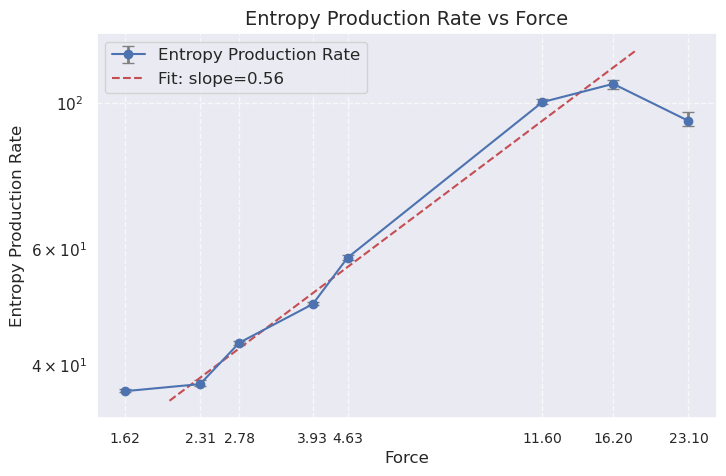

In [3]:

ep_array = jnp.array([ep_dict[key] for key in ep_dict])
ep_key_list = list(ep_dict.keys())

scale_list=[23.1,16.2, 11.6,4.63, 3.93, 2.78, 2.31, 1.62]

ep_mean = ep_array.mean(axis=1)
max_value = ep_array.max(axis=1)
min_value = ep_array.min(axis=1)
yerr = jnp.vstack((ep_mean - min_value, max_value - ep_mean))

plt.figure(figsize=(8, 5))
# plt.plot(scale_list, ep_mean, marker='o', linestyle='-', color='b', label='Entropy Production Rate')
plt.errorbar(scale_list, ep_mean, yerr=yerr, fmt='o-', color='b', ecolor='gray', elinewidth=2, capsize=4, label='Entropy Production Rate')
#
# 线性拟合
log_scale_list = jnp.log10(jnp.array(scale_list[1:-1]))
log_ep_mean = jnp.log10(ep_mean[1:-1])
coefficients = jnp.polyfit(log_scale_list, log_ep_mean, 1)
slope, intercept = coefficients
fit_line = 10**(slope * jnp.log10(jnp.array([2.,18.])) + intercept)

plt.plot([2.,18.], fit_line, linestyle='--', color='r', label=f'Fit: slope={slope:.2f}') 


plt.xscale('log')
plt.yscale('log')

# 设置横轴刻度标签
plt.xticks(scale_list, [f'{x:.2f}' for x in scale_list], fontsize=10)

# 添加标题和标签
plt.title('Entropy Production Rate vs Force', fontsize=14)
plt.xlabel('Force', fontsize=12)
plt.ylabel('Entropy Production Rate', fontsize=12)

# 添加网格和图例
plt.grid(True, linestyle='--', alpha=0.7) 
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]  # 调整顺序，0 表示 'Entropy Production Rate'，1 表示 'Fit'
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], fontsize=12)
plt.savefig("Figure/entropy_production_rate_vs_force.pdf", dpi=300, bbox_inches='tight')
